# Ising Model
In statistical physics, the Ising model is used to characterize a system of interacting spins. Each element of the lattice represents a positive or negative spin.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import math

size = 3
state = 1

Import all the necessary libraries and define the initial configuration of the lattice.

*   "size" refers to the dimensions of the square lattice
*   "state" refers to the distribution of positive and negative charges in the lattice



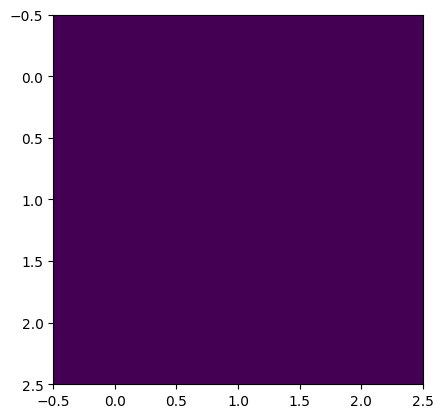

In [ ]:
def gen_lattice(dimension, init):
  lattice = np.random.random((dimension, dimension)) #generates a 2D lattice with a uniform normal distribution
  for i in range (dimension):
    for j in range(dimension):
      if lattice[i][j] >= init:
        lattice[i][j] = 1
      else:
        lattice[i][j] = -1

  return lattice

start = gen_lattice(size, state)
plt.imshow(start)

The function "gen_lattice" takes the initial parameters as an input and outputs a 2D array representing the Ising model.

By exploiting the uniform normal distribution of the random.random() function, we can control the initial distribution of positive and negative spins in the system.

In [ ]:
def find_energy(lattice):
  energy = 0

  for i in range(size-1):
    for j in range(size-1):
      energy += -lattice[i][j] * (lattice[i+1][j]+lattice[i][j+1])
  energy += -lattice[-1][-1] * (lattice[-2][-1]+lattice[-1][-2])

  return energy

def find_energy2(lattice):
  l1 = lattice[:-1, :] * lattice[1:, :]
  l2 = lattice[:, :-1] * lattice[:, 1:]

  return -(np.sum(l1) + np.sum(l2))

print(find_energy(start))
print(find_energy2(start))
print(start.sum()/size**2)

-10.0
-12.0
-1.0


The function "find_energy" above can be used to find the total energy of the lattice by summing the energy of all nearest-neighbor interactions.

This is the simplest model of a magnet. The Ising model assumes that only adjacent spins can interact with each other. In reality, even farther spins can interact, albeit with smaller effect.

There is no need to create a similar function to find the magnetization of the lattice. We can just use the sum() operation on the lattice, and divide it by the square of the dimensions to find the average magnetization.

# Metropolis Monte Carlo Simulation

The next step is to do a Monte Carlo simulation, which means modifying the lattice one element at a time.

A random element of the lattice is chosen and a spin flip is proposed. The probability of the spin flip is described by the Metropolis acceptance formula:

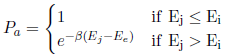

In [ ]:
iter = 1000000 #how many iterations of the metropolis algorithm do we apply?
beta = 1 #value of 1/(k_B*T)
inter = 1000 #interval of animation

Define the parameters for the Monte Carlo simulation of the Metropolis algorithm.



*   "iter" describes how many iterations of the Metropolis algorithm will be performed
*   "beta" described the Boltzmann factor, which is dependent on the temperature of the system
  *   For this case, beta is just 1 since we just assume the Boltzmann constant and the temperature to both be 1
*   "inter" is just the interval between which time steps of the lattice to be included in the animation
  *   A smaller value would be better, but it can be too computationally expensive







In [ ]:
def metropolis(lattice, b, n):
  energy = find_energy(lattice)

  e = np.zeros(n)
  m = np.zeros(n)
  l = np.zeros((int(n/inter), size, size))

  l[0] = lattice
  e[0] = energy
  m[0] = lattice.sum()

  for i in range(n):
    new_lattice = lattice
    e[i] = energy
    m[i] = new_lattice.sum()

    x = random.randint(1, size) - 1
    y = random.randint(1, size) - 1

    m_i = new_lattice[x][y]
    m_j = -m_i

    e_i = 0
    e_j = 0

    if x > 0:
      e_i += -m_i * new_lattice[x-1][y]
      e_j += -m_j * new_lattice[x-1][y]
    if x < (size - 1):
      e_i += -m_i * new_lattice[x+1][y]
      e_j += -m_j * new_lattice[x+1][y]
    if y > 0:
      e_i += -m_i * new_lattice[x][y-1]
      e_j += -m_j * new_lattice[x][y-1]
    if y < (size - 1):
      e_i += -m_i * new_lattice[x][y+1]
      e_j += -m_j * new_lattice[x][y+1]

    dE = e_j - e_i

    if (e_i >= e_j) or (np.random.random() < np.exp(-b*dE)):
      new_lattice[x][y] = m_j
      energy += dE

    if (i%inter == 0):
      l[int(i/inter)] = new_lattice

  return m, e, l

Using a for loop, the Metropolis algorithm is applied repeatedly.

Random x- and y-coordinates are chosen at each iteration. A spin flip is proposed. The change in energy is computed by accounting for the interaction with adjacent spins. There is no need to find the energy for the entire lattice, since the change in total energy will only depend on the change in the flipped spin.

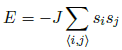

In this model, we assume J = 1. This means that aligned spins result in lower energies, which are favorable. This model can be described as "ferromagnetic."

If the spin flip results in a lower energy, the change is instantly accepted. Otherwise, the probability of the spin flip is dependent on the change in energy. Overall, we expect the model to result in aligned spins over time.

The energy, total spin, and the lattice itself across iterations are stored in separate tuples.


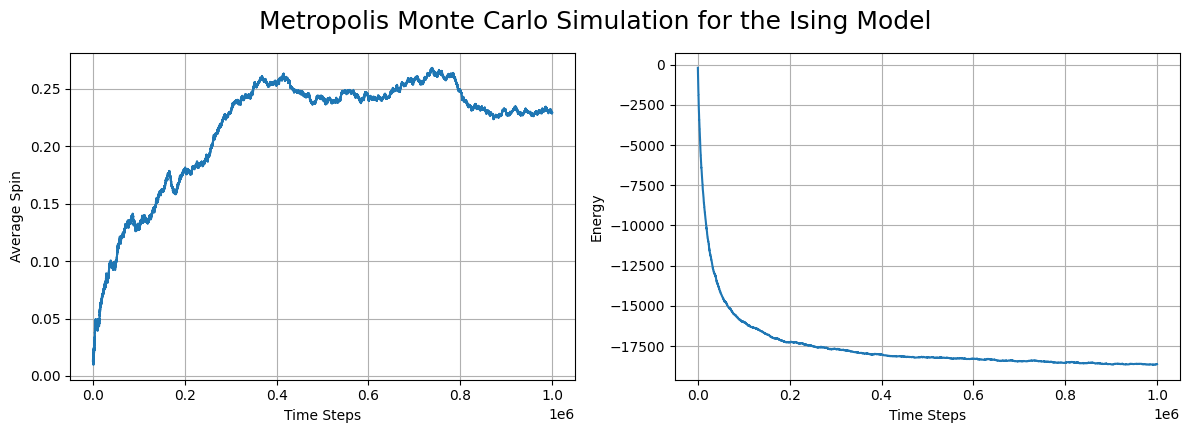

In [ ]:
spins, energies, lat = metropolis(start, beta, iter)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(spins/size**2)
ax.set_xlabel('Time Steps')
ax.set_ylabel(r'Average Spin')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Time Steps')
ax.set_ylabel(r'Energy')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Metropolis Monte Carlo Simulation for the Ising Model', y=1.07, size=18)
plt.show()

The code block above just runs the Metropolis Monte Carlo Simulation, and visualizes the average spin and energy over time using matplotlib.

As we can see, the energy rapidly decreases before slowing down, as it approaches a "frozen" state. The average spin starts nearly at 0, since there are approximately an equal number of positive and negative spins. It can go up or down depending on the spin flip, but in general it follows a trend where it gets larger and larger, representing more spins aligning.

In [ ]:
fig = plt.figure()
s = int(iter/inter)

def anim(i):
  plt.cla()
  dat = lat[i]
  im = plt.imshow(dat)
  plt.title("Ising Model \n Monte Carlo step = " + str(i * inter))

ani = animation.FuncAnimation(fig, anim, interval = 50, frames = s)
ani.save("ising.gif")

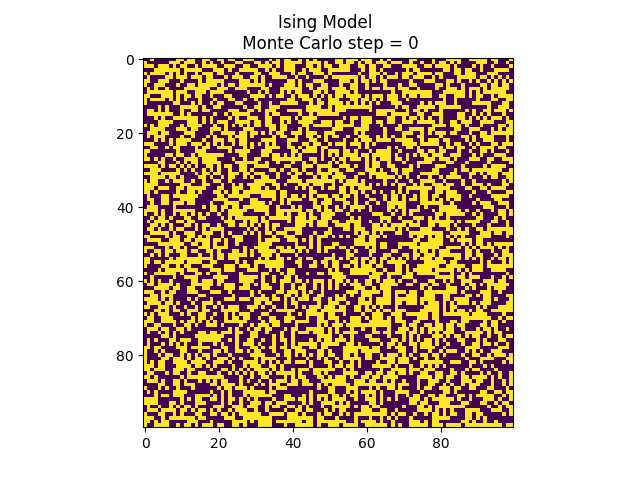

Lastly, this code block visualizes the evolution of the Ising model over time. As we can see, the initially disordered state slowly "freezes" over time as adjacent spins tend to align. This results in distinct regions of positive and negative spins. The simulation becomes "stuck," unable to access lower energy states. However, if we were in theory to run the simulation infinitely, it would reach a point where all elements have the same spin. In other words, all spins in the entire lattice are aligned. This would be the lowest energy state.

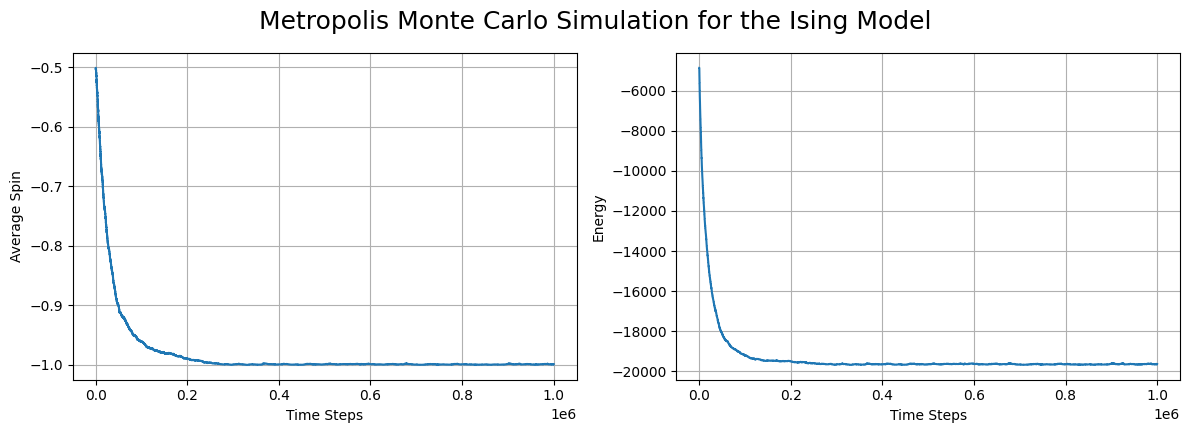

In [ ]:
ordered = gen_lattice(size, 0.75)

spins, energies, lat = metropolis(ordered, beta, iter)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(spins/size**2)
ax.set_xlabel('Time Steps')
ax.set_ylabel(r'Average Spin')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Time Steps')
ax.set_ylabel(r'Energy')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Metropolis Monte Carlo Simulation for the Ising Model', y=1.07, size=18)
plt.show()


The above code block re-reruns the simulation with different initial paramaters. In this case, the initial lattice has approximately 25% negative spins and 75% positive spins.

In [ ]:
fig = plt.figure()
s = int(iter/inter)

def anim(i):
  plt.cla()
  dat = lat[i]
  im = plt.imshow(dat)
  plt.title("Ising Model \n Monte Carlo step = " + str(i * inter))

ani = animation.FuncAnimation(fig, anim, interval = 50, frames = s)
ani.save("ising2.gif")

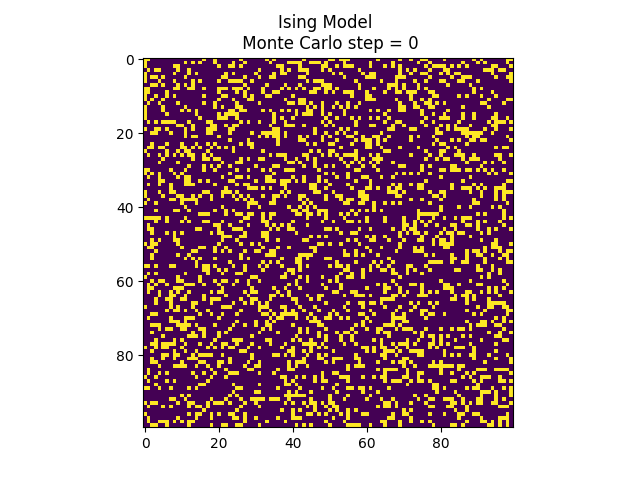

Given a more ordered initial state, the model will eventually reach a state where most spins are aligned within the scope of the simulation. This is the same result we expect to happen eventually with the original model, albeit with significantly more time steps.